# Fake News Detection

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
# TODO: Fill in the Google Drive path where you uploaded the lab materials
# Example: GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks'

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'Colab Notebooks/NLP/NLP Coursework/'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

['NLP Project - Fake News Detection.ipynb', 'best_lstm_model.h5', 'Preprocessed_test_set.csv', 'validation.tsv', 'test.tsv', 'train.tsv', 'processed_test_set_bert.csv', 'best_bert_model.pth']


In [26]:
!pip install --upgrade datasets huggingface_hub

In [3]:
pip install huggingface_hub

In [4]:
pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 18.6 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [23]:
from datasets import list_datasets

In [24]:
sall_datasets = list_datasets()

In [25]:
from huggingface_hub import list_datasets

In [26]:
all_datasets = list_datasets()

In [27]:
all_datasets

<generator object HfApi.list_datasets at 0x7ef900fd4350>

# Load the Dataset

In [3]:
import pandas as pd
# Paths for each dataset file
train_path = os.path.join(GOOGLE_DRIVE_PATH, 'train.tsv')
validation_path = os.path.join(GOOGLE_DRIVE_PATH, 'validation.tsv')
test_path = os.path.join(GOOGLE_DRIVE_PATH, 'test.tsv')

# Loading each dataset into a separate DataFrame
train_df = pd.read_csv(train_path, delimiter='\t')
val_df = pd.read_csv(validation_path, delimiter='\t')
test_df = pd.read_csv(test_path, delimiter='\t')

# Storing all DataFrames in a dictionary for easy access
news = {
    'train': train_df,
    'validation': val_df,
    'test': test_df
}


In [4]:
news

{'train':        Unnamed: 0                                              title  \
 0            2619  Ex-CIA head says Trump remarks on Russia inter...   
 1           16043  YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...   
 2             876  Federal Reserve governor Powell's policy views...   
 3           19963  SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...   
 4           10783  NANCY PELOSI ARROGANTLY DISMISSES Questions on...   
 ...           ...                                                ...   
 29995        6880  U.S. aerospace industry urges Trump to help Ex...   
 29996       17818  Highlights: Hong Kong leader Carrie Lam delive...   
 29997        5689  Obama Literally LAUGHS At Claims That Brexit M...   
 29998       15805  Syrian army takes full control of Deir al-Zor ...   
 29999        8143  U.S., Israel sign $38 billion military aid pac...   
 
                                                     text          subject  \
 0      Former CIA director John Br

In [5]:
print(train_df.columns)
len(train_df)

Index(['Unnamed: 0', 'title', 'text', 'subject', 'date', 'label'], dtype='object')


30000

In [6]:
train_df

,Unnamed: 0,title,text,subject,date,label
0,2619,Ex-CIA head says Trump remarks on Russia inter...,Former CIA director John Brennan on Friday cri...,politicsNews,"July 22, 2017",1
1,16043,YOU WON’T BELIEVE HIS PUNISHMENT! HISPANIC STO...,How did this man come to OWN this store? There...,Government News,"Jun 19, 2017",0
2,876,Federal Reserve governor Powell's policy views...,President Donald Trump on Thursday tapped Fede...,politicsNews,"November 2, 2017",1
3,19963,SCOUNDREL HILLARY SUPPORTER STARTS “TrumpLeaks...,Hillary Clinton ally David Brock is offering t...,left-news,"Sep 17, 2016",0
4,10783,NANCY PELOSI ARROGANTLY DISMISSES Questions on...,Pleading ignorance is a perfect ploy for Nancy...,politics,"May 26, 2017",0
...,...,...,...,...,...,...
29995,6880,U.S. aerospace industry urges Trump to help Ex...,The chief executive of the U.S. Aerospace Indu...,politicsNews,"December 6, 2016",1
29996,17818,Highlights: Hong Kong leader Carrie Lam delive...,The following are highlights of the maiden pol...,worldnews,"October 11, 2017",1
29997,5689,Obama Literally LAUGHS At Claims That Brexit M...,If there s one thing President Barack Obama is...,News,"June 28, 2016",0
29998,15805,Syrian army takes full control of Deir al-Zor ...,The Syrian army and its allies have taken full...,worldnews,"November 2, 2017",1


In [7]:
print(val_df.columns)
len(val_df)

Index(['Unnamed: 0', 'title', 'text', 'subject', 'date', 'label'], dtype='object')


6000

In [8]:
val_df

,Unnamed: 0,title,text,subject,date,label
0,14074,TRUMP HATER GEORGE RAMOS Promotes Movie Showin...,Mexico has been the beneficiary of our open bo...,politics,"Apr 20, 2016",0
1,17592,Germany seeks to maintain unity if U.S. decert...,The German government on Friday vowed to work ...,worldnews,"October 13, 2017",1
2,5694,No sign U.S. wants to cancel nuclear deal with...,German Foreign Minister Sigmar Gabriel said it...,politicsNews,"February 2, 2017",1
3,20036,Brazil prosecutors seek to extend Batista dete...,The Office of Brazil s Prosecutor-General Rodr...,worldnews,"September 14, 2017",1
4,234,Trump Just Asked The Most Unqualified Person E...,"Trump, who keeps promising to either scrap our...",News,"October 10, 2017",0
...,...,...,...,...,...,...
5995,12708,Trump's Jerusalem plan revives tensions in EU ...,France said on Friday the United States had si...,worldnews,"December 8, 2017",1
5996,9007,Donald Trump Rings In The New Year With A Vici...,Donald Trump s insane ways are no longer surpr...,News,"January 3, 2016",0
5997,7480,Russian parliament speaker says hopes for bett...,The speaker of Russia’s lower house of parliam...,politicsNews,"November 9, 2016",1
5998,4076,Trump tax plan will sharply slash corporate ta...,U.S. President Donald Trump is proposing to sl...,politicsNews,"April 25, 2017",1


In [9]:
print(test_df.columns)
len(test_df)

Index(['Unnamed: 0', 'title', 'text', 'subject', 'date', 'label'], dtype='object')


8267

In [10]:
test_df

,Unnamed: 0,title,text,subject,date,label
0,8104,Conservatives Will HATE What Donald Trump Just...,Donald Trump isn t exactly a stranger to makin...,News,"February 14, 2016",0
1,7467,Trump victory may create new tension between U...,Donald Trump’s U.S. election victory may creat...,politicsNews,"November 9, 2016",1
2,9473,WATCH: Hundreds of ILLEGAL ALIENS Storm Senate...,A couple of quick questions come to mind when ...,politics,"Nov 9, 2017",0
3,276,"Democratic Senator Franken to resign: CNN, cit...",U.S. Democratic Senator Al Franken will announ...,politicsNews,"December 7, 2017",1
4,19274,GANG OF DOMESTIC TERRORISTS Violently Attack L...,***WARNING*** Violence is graphic***This Trump...,left-news,"Jan 21, 2017",0
...,...,...,...,...,...,...
8262,5469,Russian MP says Flynn was forced to resign to ...,A senior Russian lawmaker said on Tuesday it w...,politicsNews,"February 14, 2017",1
8263,5079,Highlights: The Trump presidency on March 7 at...,Highlights of the day for U.S. President Donal...,politicsNews,"March 7, 2017",1
8264,20425,SHOCKER! WAS MUSLIM TERRORIST GAY? Used Gay Da...,"Of course, Mateen s Muslim father vehemently d...",left-news,"Jun 13, 2016",0
8265,22063,John McCain and The Cancer of Conflict,Patrick Henningsen 21st Century WireThis week ...,US_News,"July 21, 2017",0


# Exploratory Data Analysis (EDA)

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Print basic information about the datasets
for key, df in news.items():
    print(f"{key.upper()} DATA:")
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    print(df.info())
    print("\n")


TRAIN DATA:
Shape: (30000, 6)
Columns: ['Unnamed: 0', 'title', 'text', 'subject', 'date', 'label']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  30000 non-null  int64 
 1   title       30000 non-null  object
 2   text        30000 non-null  object
 3   subject     30000 non-null  object
 4   date        30000 non-null  object
 5   label       30000 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 1.4+ MB
None


VALIDATION DATA:
Shape: (6000, 6)
Columns: ['Unnamed: 0', 'title', 'text', 'subject', 'date', 'label']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6000 non-null   int64 
 1   title       6000 non-null   object
 2   text        6000 non-null   object
 3   su

In [52]:
# Check for missing values
for key, df in news.items():
    print(f"{key.upper()} missing values:")
    print(df.isnull().sum())
    print("\n")


TRAIN missing values:
Unnamed: 0    0
title         0
text          0
subject       0
date          0
label         0
dtype: int64


VALIDATION missing values:
Unnamed: 0    0
title         0
text          0
subject       0
date          0
label         0
dtype: int64


TEST missing values:
Unnamed: 0    0
title         0
text          0
subject       0
date          0
label         0
dtype: int64




<ipython-input-61-f6813e39312f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, ax=axes[idx], palette=palette, edgecolor='black')
<ipython-input-61-f6813e39312f>:14: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x='label', data=df, ax=axes[idx], palette=palette, edgecolor='black')
<ipython-input-61-f6813e39312f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, ax=axes[idx], palette=palette, edgecolor='black')
<ipython-input-61-f6813e39312f>:14: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x='label', data=df, ax=axes[

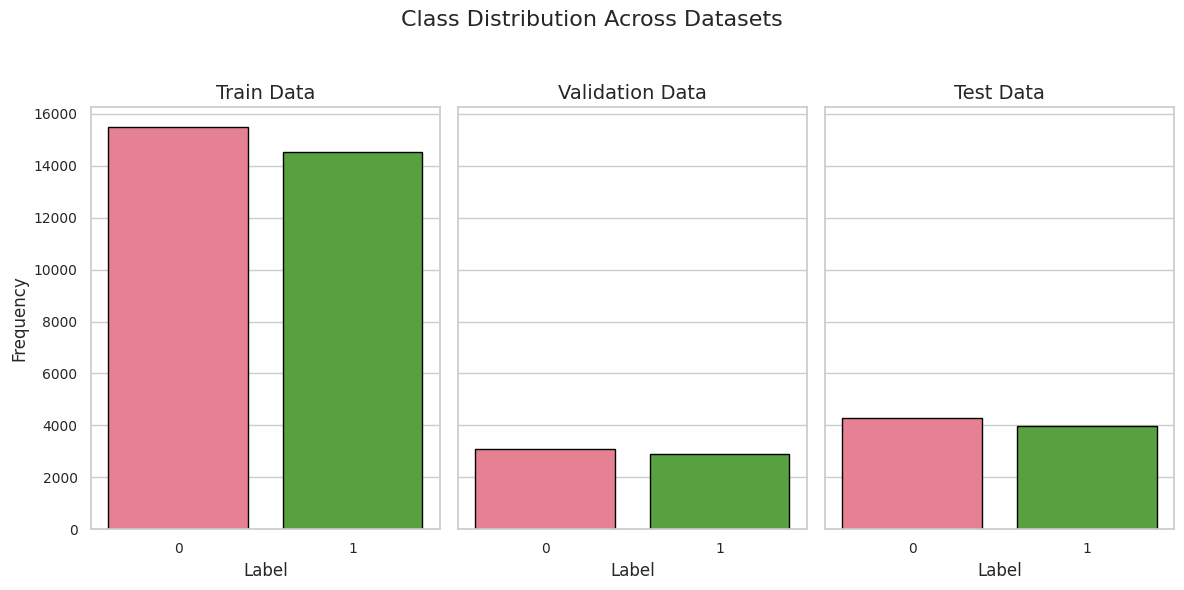

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style and palette for all plots
sns.set(style="whitegrid")
palette = sns.color_palette("husl", 3)  # A color palette for three datasets

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 6), sharey=True)
fig.suptitle('Class Distribution Across Datasets', fontsize=16)  # Add a centered title to the figure

for idx, (key, df) in enumerate(news.items()):
    # Create a count plot for each dataset
    sns.countplot(x='label', data=df, ax=axes[idx], palette=palette, edgecolor='black')

    # Customize subplot titles and labels
    axes[idx].set_title(f'{key.capitalize()} Data', fontsize=14)
    axes[idx].set_xlabel('Label', fontsize=12)
    if idx == 0:  # Only add Y label to the first subplot for clarity
        axes[idx].set_ylabel('Frequency', fontsize=12)
    else:
        axes[idx].set_ylabel('')  # Remove y label for other subplots

    # Modify tick parameters
    axes[idx].tick_params(axis='x', labelsize=10)
    axes[idx].tick_params(axis='y', labelsize=10)

# Adjust the layout to prevent overlap and ensure labels are clear
plt.tight_layout(rect=[0, 0, 1, 0.95])

# Show the plot
plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


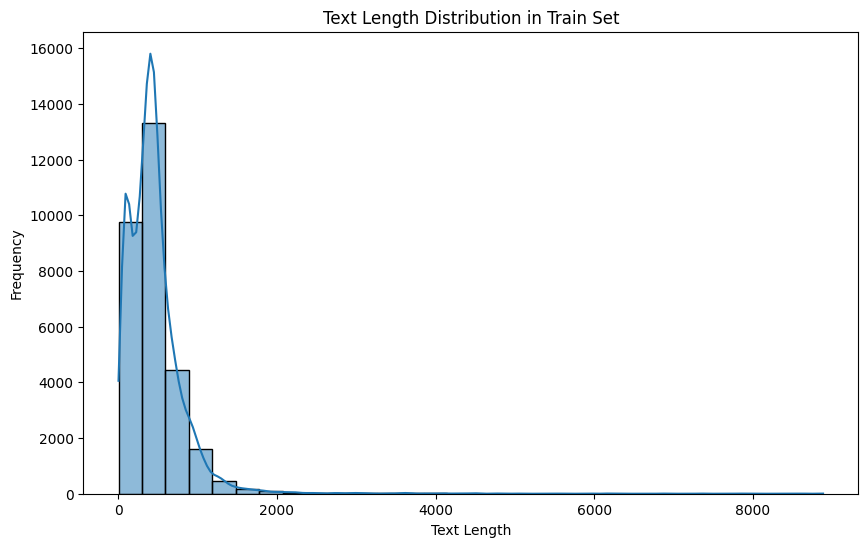

Most Common Words in Train Set:
the: 683343
,: 599351
.: 412306
to: 361632
of: 298764
a: 276767
and: 275116
in: 233646
that: 160978
s: 155074
on: 128299
for: 115941
is: 112429
he: 89457
said: 87991
it: 86653
trump: 86635
with: 79640
was: 78128
as: 69781




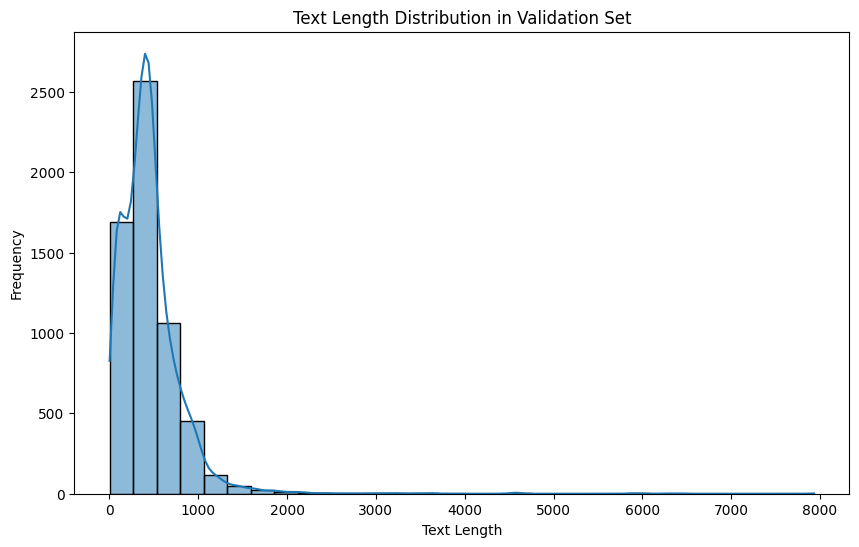

Most Common Words in Validation Set:
the: 135835
,: 119141
.: 81290
to: 71475
of: 58980
a: 54681
and: 54420
in: 46570
that: 32182
s: 30644
on: 25434
for: 23051
is: 22443
said: 17641
he: 17543
trump: 17466
it: 17213
with: 15725
was: 15514
as: 13838




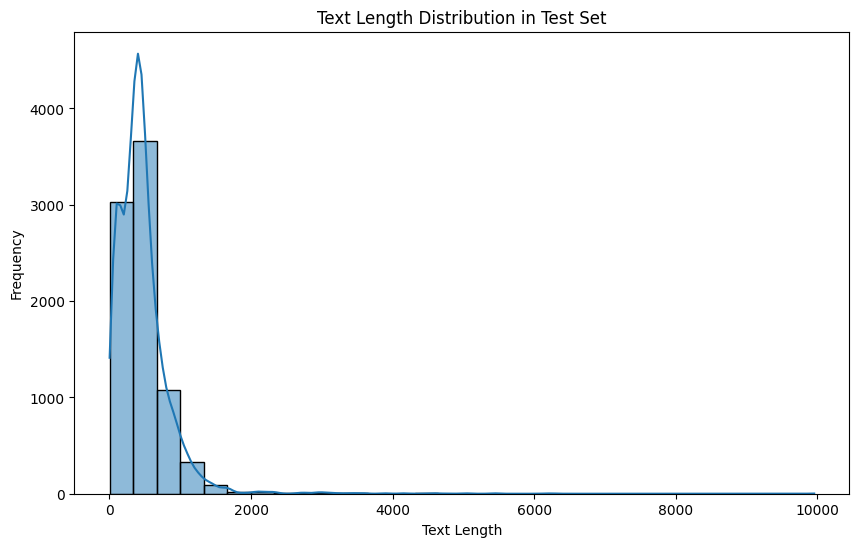

Most Common Words in Test Set:
the: 191075
,: 169572
.: 116647
to: 101385
of: 82767
a: 77440
and: 76467
in: 65113
that: 45166
s: 43729
on: 35937
for: 32825
is: 31426
he: 24984
it: 24861
said: 24537
trump: 24270
with: 22074
was: 22069
as: 19654




In [56]:
import nltk
from nltk.tokenize import word_tokenize

# Ensure that NLTK's punkt tokenizer is downloaded
nltk.download('punkt')

# Analyze text statistics - Text length and most common words
def plot_text_statistics(df, title):
    # Tokenize words
    df['tokenized'] = df['text'].apply(word_tokenize)
    df['text_length'] = df['tokenized'].apply(len)

    # Plot text length distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(df['text_length'], bins=30, kde=True)
    plt.title(f'Text Length Distribution in {title}')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.show()

    # Most common words
    all_words = [word.lower() for tokens in df['tokenized'] for word in tokens]
    word_freq = Counter(all_words)
    most_common_words = word_freq.most_common(20)
    print(f"Most Common Words in {title}:")
    for word, freq in most_common_words:
        print(f"{word}: {freq}")
    print("\n")

# Apply text statistics analysis to each dataset
for key, df in news.items():
    plot_text_statistics(df, f"{key.capitalize()} Set")

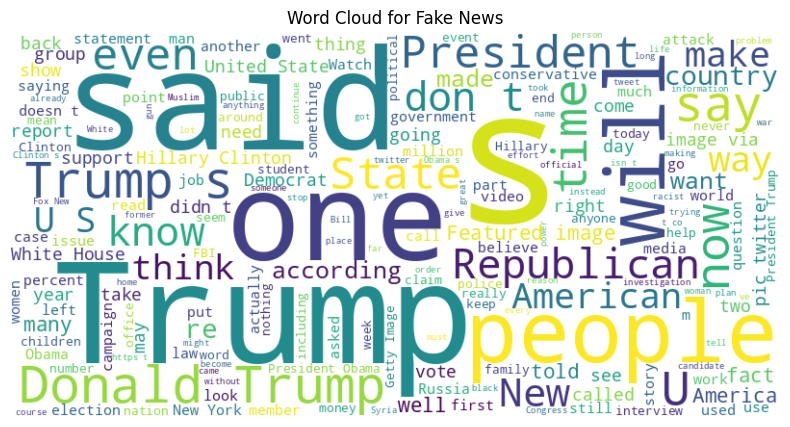

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import pandas as pd

# Filter texts based on labels
fake_news_text = " ".join(text for text in test_df[test_df['label'] == 0]['text'])
real_news_text = " ".join(text for text in test_df[test_df['label'] == 1]['text'])

# Function to generate and display a word cloud
def generate_word_cloud(text, title, background_color='white'):
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color=background_color, max_words=200).generate(text)

    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate and display word clouds for Fake News and Real News
generate_word_cloud(fake_news_text, "Word Cloud for Fake News")


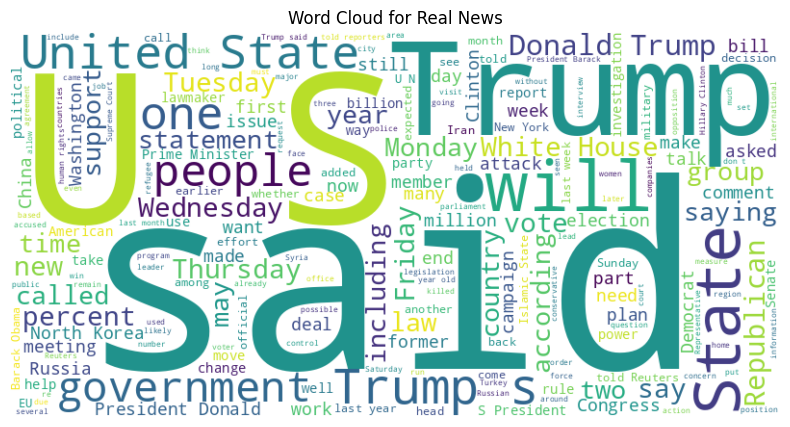

In [14]:
generate_word_cloud(real_news_text, "Word Cloud for Real News")

# Preprocessing

### Import the libraries

In [15]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Preprocessing to training and validation datasets

In [40]:
# Function to check and process DataFrame
def process_text_data(df, tokenizer, column_name='text', maxlen=200):
    if column_name in df.columns:
        df['processed_text'] = df[column_name]
        sequences = tokenizer.texts_to_sequences(df['processed_text'])
        padded = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')
        return padded
    else:
        print(f"Error: '{column_name}' column not found in DataFrame!")
        return None

# Initialize tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')

# Assuming train_df, val_df, test_df are predefined DataFrames
tokenizer.fit_on_texts(train_df['text'])  # Fit tokenizer only on training data for fairness

# Process each DataFrame
train_padded = process_text_data(train_df, tokenizer)
val_padded = process_text_data(val_df, tokenizer) if 'val_df' in locals() else None
test_padded = process_text_data(test_df, tokenizer) if 'test_df' in locals() else None

# Extract labels
train_labels = train_df['label'].values
val_labels = val_df['label'].values
test_labels = test_df['label'].values

# Print shapes of the padded sequences
print("Shape of train_padded:", train_padded.shape if train_padded is not None else "Data not available")
if val_padded is not None:
    print("Shape of val_padded:", val_padded.shape)
if test_padded is not None:
    print("Shape of test_padded:", test_padded.shape)

Shape of train_padded: (30000, 200)
Shape of val_padded: (6000, 200)
Shape of test_padded: (8267, 200)


In [40]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

def process_text_data(df, tokenizer, column_name='text', maxlen=200):
    if column_name in df.columns:
        df['processed_text'] = df[column_name]
        sequences = tokenizer.texts_to_sequences(df['processed_text'])
        padded = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')
        # Ensure the output is float32 to avoid future compatibility issues
        padded = padded.astype('float32')
        return padded
    else:
        print(f"Error: '{column_name}' column not found in DataFrame!")
        return None

# Initialize tokenizer
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(train_df['text'])  # Fit tokenizer only on training data

# Process each DataFrame
test_padded = process_text_data(test_df, tokenizer)

# Create a DataFrame and add labels for saving
test_padded_df = pd.DataFrame(test_padded)

# Ensure test_labels are defined and correctly aligned with the test data
test_padded_df['label'] = test_labels

# Saving the DataFrame with padded data and labels to a CSV file (optional)
test_padded_df.to_csv('/content/Preprocessed_test_set.csv', index=False)

# Print confirmation that data is processed and saved
print("Test data processed and saved successfully.")


Test data processed and saved successfully.


# 1. Basline Model

## 1. Basline Logistic Regression

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [44]:
# Enhancing TF-IDF vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=10, min_df=5)

# Fit on the training data and transform it to feature vectors
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['text'])
X_val_tfidf = tfidf_vectorizer.transform(val_df['text'])
X_test_tfidf = tfidf_vectorizer.transform(test_df['text'])

# Train a Logistic Regression model on the TF-IDF vectors with regularization
model = LogisticRegression(max_iter=10, C=0.1)
model.fit(X_train_tfidf, train_df['label'])

# Predict and evaluate on the validation set
val_predictions = model.predict(X_val_tfidf)
val_accuracy = accuracy_score(val_df['label'], val_predictions)

# Output the performance metrics
print(f"Validation Accuracy: {val_accuracy:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(val_df['label'], val_predictions))
print("\nClassification Report:")
print(classification_report(val_df['label'], val_predictions))

Validation Accuracy: 0.7562
Confusion Matrix:
[[2326  763]
 [ 700 2211]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      3089
           1       0.74      0.76      0.75      2911

    accuracy                           0.76      6000
   macro avg       0.76      0.76      0.76      6000
weighted avg       0.76      0.76      0.76      6000



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Plot the Confusion Matrix for Validation set

[[2326  763]
 [ 700 2211]]


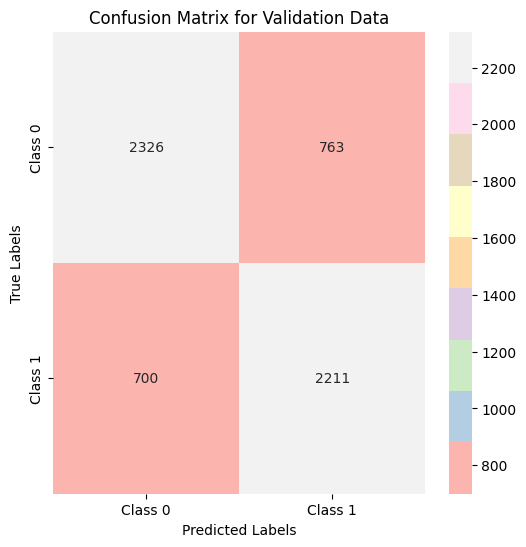

In [46]:
# Calculate confusion matrix
val_conf_matrix = confusion_matrix(val_df['label'], val_predictions)
# Output the confusion matrix in text
print(val_conf_matrix)

# Plotting the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(val_conf_matrix, annot=True, fmt='d', cmap='Pastel1',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Validation Data')
plt.show()

### Prediction on Train set and plot

Training Accuracy: 0.7548
Confusion Matrix:
[[11731  3747]
 [ 3610 10912]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.76      0.76     15478
           1       0.74      0.75      0.75     14522

    accuracy                           0.75     30000
   macro avg       0.75      0.75      0.75     30000
weighted avg       0.75      0.75      0.75     30000



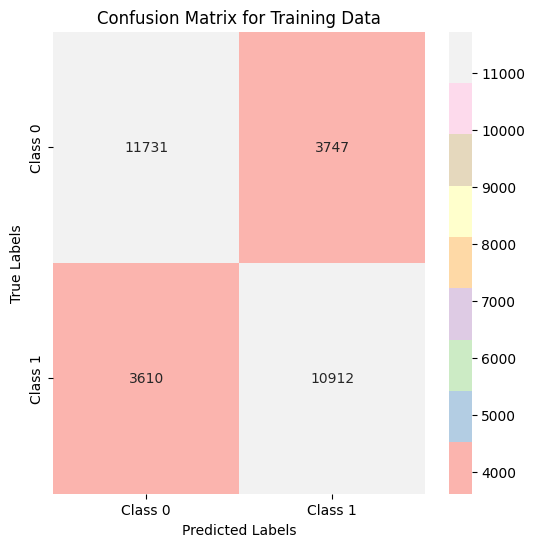

In [48]:
# Predict on the training set
y_train_pred = model.predict(X_train_tfidf)
train_accuracy = accuracy_score(train_df['label'], y_train_pred)

# Output the accuracy for the training set
print(f"Training Accuracy: {train_accuracy:.4f}")

# Calculate confusion matrix for the training data
train_conf_matrix = confusion_matrix(train_df['label'], y_train_pred)

# Output the confusion matrix in text
print("Confusion Matrix:")
print(train_conf_matrix)

# Output the classification report
print("\nClassification Report:")
print(classification_report(train_df['label'], y_train_pred))

# Plotting the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Pastel1',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Training Data')
plt.show()

### Prediction on Test set and plot

Test Accuracy: 0.7575
Confusion Matrix for Test Set:
[[3285  999]
 [1006 2977]]

Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77      4284
           1       0.75      0.75      0.75      3983

    accuracy                           0.76      8267
   macro avg       0.76      0.76      0.76      8267
weighted avg       0.76      0.76      0.76      8267



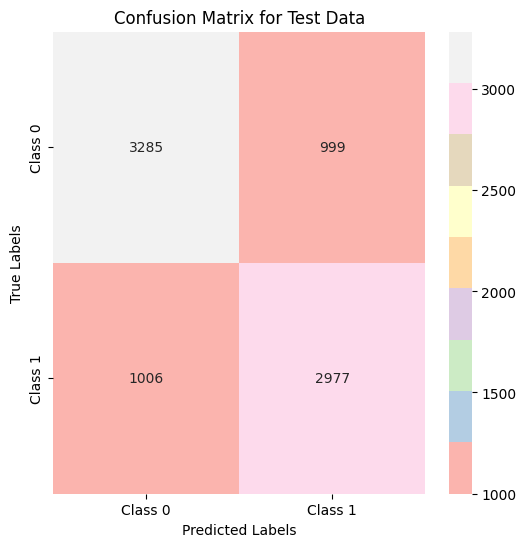

In [49]:
# Transform test data with the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(test_df['text'])

# Predict on the test set
y_test_pred = model.predict(X_test_tfidf)
test_accuracy = accuracy_score(test_df['label'], y_test_pred)

# Print the test accuracy
print(f"Test Accuracy: {test_accuracy:.4f}")

# Display confusion matrix and classification report for test data
test_conf_matrix = confusion_matrix(test_df['label'], y_test_pred)
print("Confusion Matrix for Test Set:")
print(test_conf_matrix)

print("\nClassification Report for Test Set:")
print(classification_report(test_df['label'], y_test_pred))

# Plotting the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Pastel1',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Test Data')
plt.show()

# 2. LSTM Model

In [ ]:
!pip install scikeras

  Using cached keras-3.3.3-py3-none-any.whl (1.1 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 3.3.3 which is incompatible.


In [ ]:
!pip install tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 11.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikeras 0.13.0 requires keras>=3.2.0, but you have keras 2.15.0 which is incompatible.


In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
# Define the model with dropout and L2 regularization
# Update the model architecture
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=200),
    BatchNormalization(),  # Apply batch normalization
    LSTM(64, return_sequences=True, kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    LSTM(32, kernel_regularizer=l2(0.001)),
    Dropout(0.5),
    BatchNormalization(),  # Another batch normalization layer before the output
    Dense(1, activation='sigmoid')
])

# Compile the model with a reduced learning rate
optimizer = Adam(learning_rate=0.0001)  # Lower learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# Early stopping callback to halt training when validation loss stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# ModelCheckpoint callback to save the best model
model_checkpoint = ModelCheckpoint(
    '/content/best_lstm_model.h5',  # Path to save the model
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Train the model with validation data and early stopping
history = model.fit(
    train_padded, train_labels,
    epochs=5,  # Epoch
    batch_size=64,
    validation_data=(val_padded, val_labels),
    verbose=1,
    callbacks=[early_stopping, model_checkpoint]  # Includind both callbacks
)

# Accessing the history data for accuracies
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Printing the accuracies per epoch
print("Training Accuracies per Epoch:", train_acc)
print("Validation Accuracies per Epoch:", val_acc)

# Display the final epoch's training and validation accuracy
print(f"Final Training Accuracy: {train_acc[-1]:.4f}")
print(f"Final Validation Accuracy: {val_acc[-1]:.4f}")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          640000    
                                                                 
 batch_normalization (Batch  (None, 200, 128)          512       
 Normalization)                                                  
                                                                 
 lstm (LSTM)                 (None, 200, 64)           49408     
                                                                 
 dropout (Dropout)           (None, 200, 64)           0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                        

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


469/469 [==============================] - ETA: 0s - loss: 0.5887 - accuracy: 0.8429
Epoch 2: val_loss improved from 0.59252 to 0.52693, saving model to /content/best_lstm_model.h5
469/469 [==============================] - 195s 414ms/step - loss: 0.5887 - accuracy: 0.8429 - val_loss: 0.5269 - val_accuracy: 0.8788
Epoch 3/5
469/469 [==============================] - ETA: 0s - loss: 0.4118 - accuracy: 0.9407
Epoch 3: val_loss improved from 0.52693 to 0.34030, saving model to /content/best_lstm_model.h5
469/469 [==============================] - 194s 414ms/step - loss: 0.4118 - accuracy: 0.9407 - val_loss: 0.3403 - val_accuracy: 0.9683
Epoch 4/5
469/469 [==============================] - ETA: 0s - loss: 0.3489 - accuracy: 0.9662
Epoch 4: val_loss did not improve from 0.34030
469/469 [==============================] - 205s 437ms/step - loss: 0.3489 - accuracy: 0.9662 - val_loss: 0.3526 - val_accuracy: 0.9627
Epoch 5/5
469/469 [==============================] - ETA: 0s - loss: 0.3258 - acc

### Prediction on training and validation

In [52]:
# Predict classes or probabilities for training and validation sets
train_predictions = model.predict(train_padded)
val_predictions = model.predict(val_padded)

# Convert these probabilities to binary outputs, usually using 0.5 as a threshold
train_predicted_classes = (train_predictions > 0.5).astype(int)
val_predicted_classes = (val_predictions > 0.5).astype(int)
# Compute confusion matrices
train_conf_matrix = confusion_matrix(train_labels, train_predicted_classes)
val_conf_matrix = confusion_matrix(val_labels, val_predicted_classes)

# Print the confusion matrices
print("Training Confusion Matrix:")
print(train_conf_matrix)
print("Validation Confusion Matrix:")
print(val_conf_matrix)


188/188 [==============================] - 11s 59ms/step
Training Confusion Matrix:
[[14922   556]
 [  180 14342]]
Validation Confusion Matrix:
[[2936  153]
 [  50 2861]]


In [53]:
# Calculate accuracy for training and validation
train_accuracy = accuracy_score(train_labels, train_predicted_classes)
val_accuracy = accuracy_score(val_labels, val_predicted_classes)

# Print accuracies
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")

# You can also print classification reports for more details
print("Training Classification Report:")
print(classification_report(train_labels, train_predicted_classes))

print("Validation Classification Report:")
print(classification_report(val_labels, val_predicted_classes))


Training Accuracy: 0.9755
Validation Accuracy: 0.9662
Training Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     15478
           1       0.96      0.99      0.97     14522

    accuracy                           0.98     30000
   macro avg       0.98      0.98      0.98     30000
weighted avg       0.98      0.98      0.98     30000

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      3089
           1       0.95      0.98      0.97      2911

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000



### Training Confusion Matrix

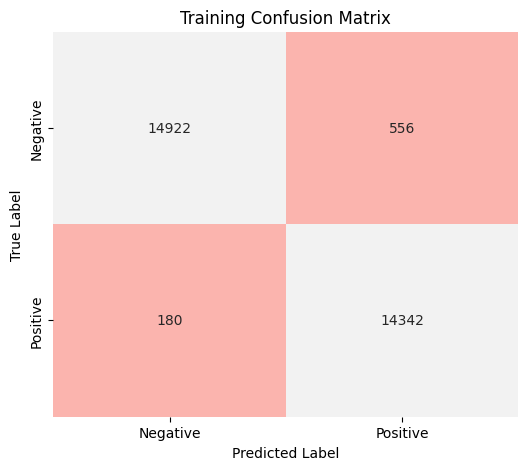

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np

# Compute confusion matrices
train_conf_matrix = confusion_matrix(train_labels, train_predicted_classes)
val_conf_matrix = confusion_matrix(val_labels, val_predicted_classes)

# Function to plot a confusion matrix
def plot_confusion_matrix(conf_matrix, title='Confusion Matrix', labels=['Negative', 'Positive']):
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Pastel1', cbar=False, xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(title)
    plt.show()

# Plot training confusion matrix
plot_confusion_matrix(train_conf_matrix, title='Training Confusion Matrix')


### Validation Confusion matrix

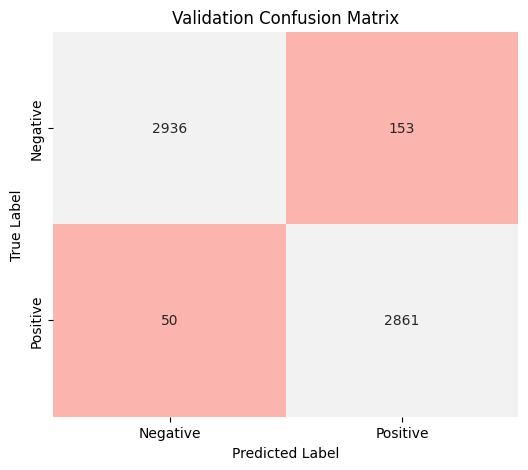

In [73]:
# Plot validation confusion matrix
plot_confusion_matrix(val_conf_matrix, title='Validation Confusion Matrix')

### ROC, AUC Curve of train and validation

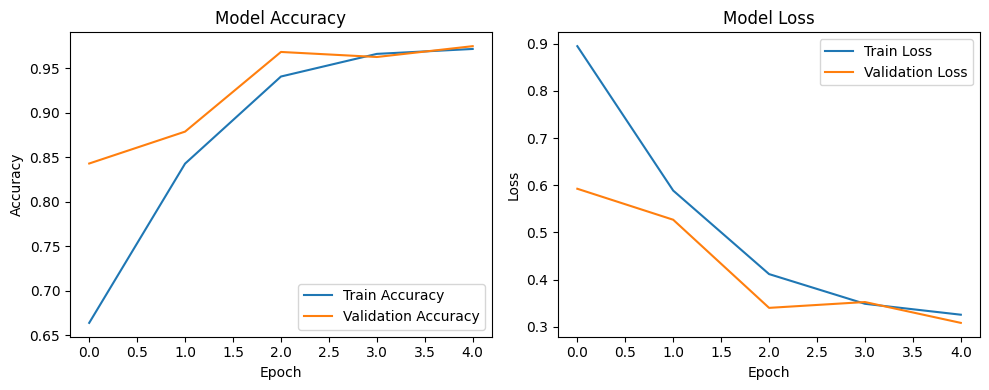

In [46]:
# Plot training & validation accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Apply the best model on Test set

In [47]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed test data
test_df = pd.read_csv('/content/Preprocessed_test_set.csv')

# Assume the last column contains labels and the rest are features
test_features = test_df.drop(columns=['label']).values
test_labels = test_df['label'].values

# Ensure all features are of type float32
test_features = test_features.astype('float32')

# Load the saved model
model = load_model('/content/best_lstm_model.h5')

# Check shape and data types
print("Test features shape:", test_features.shape)
print("Test features dtype:", test_features.dtype)

# Predict probabilities for the test set
predictions = model.predict(test_features)

# Convert probabilities to binary predictions (1 if probability > 0.5, else 0)
predicted_classes = (predictions > 0.5).astype(int).flatten()

# Calculate the accuracy of the model
accuracy = accuracy_score(test_labels, predicted_classes)
print(f"Test Accuracy: {accuracy:.4f}")

# Generate a confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Generate a classification report
class_report = classification_report(test_labels, predicted_classes)
print("Classification Report:")
print(class_report)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_features, test_labels, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test features shape: (8267, 200)
Test features dtype: float32
259/259 [==============================] - 26s 93ms/step
Test Accuracy: 0.9670
Confusion Matrix:
[[4092  192]
 [  81 3902]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      4284
           1       0.95      0.98      0.97      3983

    accuracy                           0.97      8267
   macro avg       0.97      0.97      0.97      8267
weighted avg       0.97      0.97      0.97      8267

Test Loss: 0.3281
Test Accuracy: 0.9670


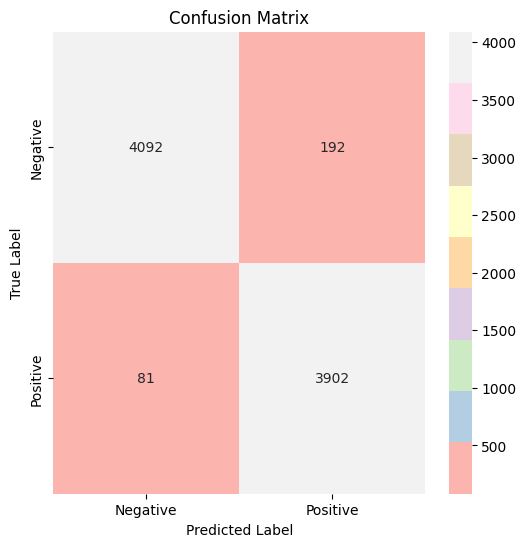

In [74]:
# Generate and plot confusion matrix
conf_matrix = confusion_matrix(test_labels, predicted_classes)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Pastel1', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


259/259 [==============================] - 18s 70ms/step


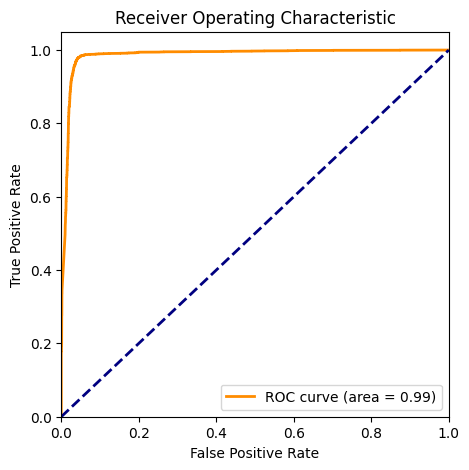

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities
prob_predictions = model.predict(test_features).flatten()

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(test_labels, prob_predictions)
roc_auc = auc(fpr, tpr)

# Plot of a ROC curve for a specific class
plt.figure(figsize=(5, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# 3. BERT

### Step 1: Preprocessing for BERT

In [36]:
# Shuffle the dataframes to randomize the rows
train_df = train_df.sample(frac=1, random_state=42).reset_index(drop=True)
val_df = val_df.sample(frac=1, random_state=42).reset_index(drop=True)
test_df = test_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Get the length of each dataframe
train_len = len(train_df)
val_len = len(val_df)
test_len = len(test_df)

# Calculate 1/4th of each dataframe length
train_len_1_4 = int(train_len * 0.20)
val_len_1_4 = int(val_len * 0.25)
test_len_1_4 = int(test_len * 0.25)

# Subset each dataframe to 1/4th
train_df_subset = train_df.iloc[:train_len_1_4]
val_df_subset = val_df.iloc[:val_len_1_4]
test_df_subset = test_df.iloc[:test_len_1_4]

# Print the lengths of the subsets
print("Length of train subset:", len(train_df_subset))
print("Length of validation subset:", len(val_df_subset))
print("Length of test subset:", len(test_df_subset))

# Save the processed test set to a CSV file
test_df_subset.to_csv('processed_test_set_bert.csv', index=False)

# Confirm file has been saved
print("Processed test set saved successfully.")

Length of train subset: 6000
Length of validation subset: 1500
Length of test subset: 2066
Processed test set saved successfully.


### Step 2: Train the Model

In [37]:
import torch
import torch.nn as nn
from transformers import BertModel, BertTokenizer
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Define the model architecture
class BERTClassifier(nn.Module):
    def __init__(self, num_classes):
        super(BERTClassifier, self).__init__()
        # Initialize the BERT model
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        # Dropout layer to prevent overfitting
        self.dropout = nn.Dropout(0.5)
        # Final fully connected layer for classification
        self.fc = nn.Linear(768, num_classes)

    def forward(self, input_ids, attention_mask):
        # Forward pass through BERT and subsequent layers
        output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = output.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

# Dataset handling class
class CustomDataset(Dataset):
    def __init__(self, df, tokenizer, max_length=128):
        self.df = df
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        text = self.df.iloc[idx]['text']
        label = self.df.iloc[idx]['label']
        # Encode text for BERT
        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Setup CUDA device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BERTClassifier(num_classes=2).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

# Prepare data loaders for training and validation datasets
train_loader = DataLoader(CustomDataset(train_df_subset, tokenizer), batch_size=16, shuffle=True)
val_loader = DataLoader(CustomDataset(val_df_subset, tokenizer), batch_size=16)

num_epochs = 3
best_accuracy = 0.0
best_model_state = None
train_accuracies = []
val_accuracies = []
losses = []

# Train the model
for epoch in range(num_epochs):
    model.train()
    train_preds, train_labels = [], []
    epoch_loss = 0
    for batch in train_loader:
        input_ids, attention_mask, labels = (batch['input_ids'].to(device),
                                             batch['attention_mask'].to(device),
                                             batch['label'].to(device))
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        _, preds = torch.max(outputs, 1)
        train_preds.extend(preds.cpu().numpy())
        train_labels.extend(labels.cpu().numpy())

    # Calculate training accuracy for the epoch
    train_accuracy = accuracy_score(train_labels, train_preds)
    train_accuracies.append(train_accuracy)
    losses.append(epoch_loss / len(train_loader))

    model.eval()
    val_preds, val_labels = [], []
    with torch.no_grad():
        for batch in val_loader:
            input_ids, attention_mask, labels = (batch['input_ids'].to(device),
                                                 batch['attention_mask'].to(device),
                                                 batch['label'].to(device))
            outputs = model(input_ids, attention_mask)
            _, preds = torch.max(outputs, 1)
            val_preds.extend(preds.cpu().numpy())
            val_labels.extend(labels.cpu().numpy())

    # Calculate validation accuracy for the epoch
    val_accuracy = accuracy_score(val_labels, val_preds)
    val_accuracies.append(val_accuracy)
    if val_accuracy > best_accuracy:
        best_accuracy = val_accuracy
        best_model_state = model.state_dict()
        torch.save(best_model_state, 'best_bert_model.pth')  # Save the best model

    # Print accuracy results for the current epoch
    print(f'Epoch {epoch+1}: Train Accuracy: {train_accuracy:.4f}, Validation Accuracy: {val_accuracy:.4f}')

# Load the best model for final evaluation
model.load_state_dict(torch.load('best_bert_model.pth'))
model.eval()

# Print classification report for the best model
print("Classification Report for Best Model on Validation Data:\n", classification_report(val_labels, val_preds))


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Epoch 1: Train Accuracy: 0.9673, Validation Accuracy: 0.9753
Epoch 2: Train Accuracy: 0.9848, Validation Accuracy: 0.9773
Epoch 3: Train Accuracy: 0.9878, Validation Accuracy: 0.9773
Classification Report for Best Model on Validation Data:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       743
           1       0.99      0.97      0.98       757

    accuracy                           0.98      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.98      0.98      0.98      1500



### Step 3: Plot the ROC, AUC Curve

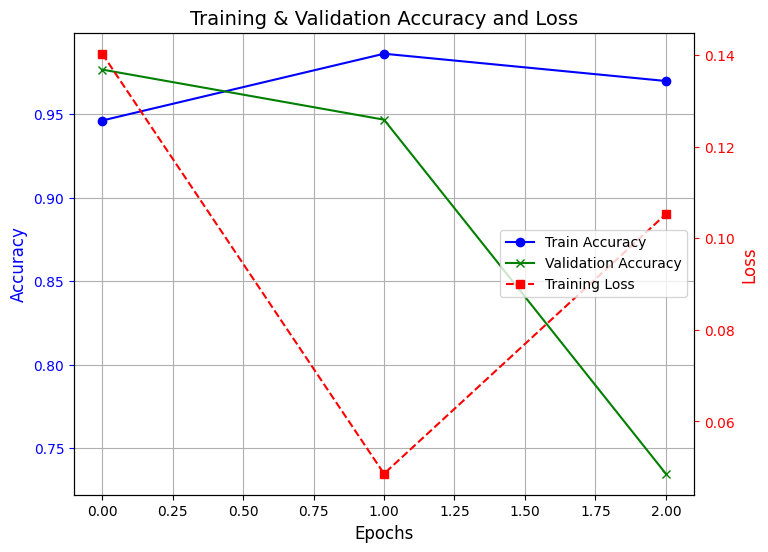

In [87]:
import matplotlib.pyplot as plt

# Prepare to plot both accuracies and loss on the same figure with different y-axes
fig, ax1 = plt.subplots(figsize=(8, 6))

# Create a second y-axis to plot the loss
ax2 = ax1.twinx()

# Plot training and validation accuracy on the first y-axis
accuracy_line1, = ax1.plot(train_accuracies, label='Train Accuracy', color='blue', marker='o')
accuracy_line2, = ax1.plot(val_accuracies, label='Validation Accuracy', color='green', marker='x')

# Plot training loss on the second y-axis
loss_line, = ax2.plot(losses, label='Training Loss', color='red', linestyle='--', marker='s')

# Labels and title
ax1.set_xlabel('Epochs', fontsize=12)
ax1.set_ylabel('Accuracy', fontsize=12, color='blue')
ax2.set_ylabel('Loss', fontsize=12, color='red')
plt.title('Training & Validation Accuracy and Loss', fontsize=14)

# Handling legends
lines = [accuracy_line1, accuracy_line2, loss_line]
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc='center right')

# Fine-tuning the grid, layout, and ticks for better readability
ax1.tick_params(axis='y', colors='blue')
ax2.tick_params(axis='y', colors='red')
ax1.grid(True)

plt.show()


### Confusion Matrix on Validation set

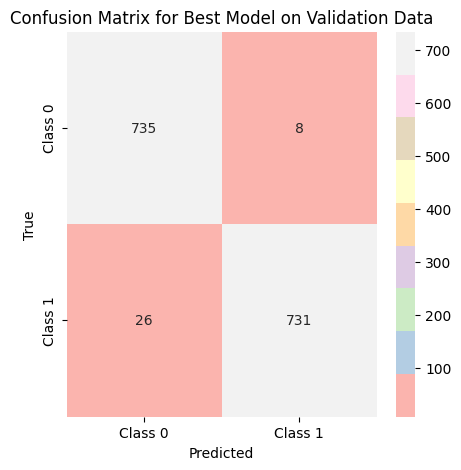

In [38]:
# Plot confusion matrix for validation data of the best model
cm = confusion_matrix(val_labels, val_preds)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel1', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Best Model on Validation Data')
plt.show()

### Confusion Matrix on Train set

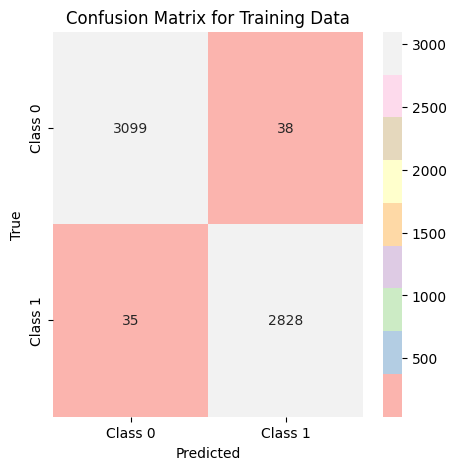

In [39]:
# Calculate the confusion matrix for the training data
train_cm = confusion_matrix(train_labels, train_preds)

# Plot the confusion matrix using seaborn and matplotlib
plt.figure(figsize=(5, 5))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Pastel1', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Training Data')
plt.show()

### Step 4: Apply the best model on Testset

In [86]:
import torch
import torch.nn as nn
from transformers import BertModel, BertTokenizer
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

class BERTClassifier(nn.Module):
    def __init__(self, num_classes):
        super(BERTClassifier, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.dropout = nn.Dropout(0.5)  # Adjust dropout rate as necessary
        self.fc = nn.Linear(768, num_classes)

    def forward(self, input_ids, attention_mask):
        output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = output.pooler_output
        pooled_output = self.dropout(pooled_output)
        logits = self.fc(pooled_output)
        return logits

class TestDataset(Dataset):
    def __init__(self, df, tokenizer, max_length=128):
        self.df = df
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        text = self.df.iloc[idx]['text']
        label = self.df.iloc[idx]['label']

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'label': torch.tensor(label, dtype=torch.long)
        }

# Set up the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the model
model = BERTClassifier(num_classes=2)
model.load_state_dict(torch.load('best_bert_model.pth'))
model.to(device)
model.eval()

# Path usage
test_df_path = GOOGLE_DRIVE_PATH + 'processed_test_set_bert.csv'
test_df = pd.read_csv(test_df_path)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
test_dataset = TestDataset(test_df, tokenizer)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

# Function to predict and evaluate
def predict_and_evaluate(model, data_loader):
    predictions = []
    actuals = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask)
            _, preds = torch.max(outputs, dim=1)

            predictions.extend(preds.cpu().numpy())
            actuals.extend(labels.cpu().numpy())

    return predictions, actuals

# Make predictions and evaluate
predictions, actuals = predict_and_evaluate(model, test_loader)

# Calculate and print metrics
test_accuracy = accuracy_score(actuals, predictions)
conf_matrix = confusion_matrix(actuals, predictions)
class_report = classification_report(actuals, predictions, target_names=['Class 0', 'Class 1'])

print("Test Accuracy:", test_accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Test Accuracy: 0.9820909970958374
Confusion Matrix:
 [[1062   26]
 [  11  967]]
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.99      0.98      0.98      1088
     Class 1       0.97      0.99      0.98       978

    accuracy                           0.98      2066
   macro avg       0.98      0.98      0.98      2066
weighted avg       0.98      0.98      0.98      2066

